# Sentiment analysis COVID-19 scholar's articles

# Imports

In [53]:
import os
import json
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from  nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.collocations import *
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
np.random.seed(0)

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is D816-28B0

 Directory of C:\Users\luigi\FlatironSchool\personal_project

26/03/2020  11:51    <DIR>          .
26/03/2020  11:51    <DIR>          ..
23/03/2020  13:33    <DIR>          .ipynb_checkpoints
23/03/2020  13:30    <DIR>          biorxiv_medrxiv
23/03/2020  13:13    <DIR>          comm_use_subset
20/03/2020  23:32            26,690 COVID.DATA.LIC.AGMT.pdf
26/03/2020  11:51           387,602 COVID-19.ipynb
23/03/2020  13:13    <DIR>          custom_license
20/03/2020  23:37             2,906 json_schema.txt
20/03/2020  23:37             1,574 metadata.readme
23/03/2020  13:14    <DIR>          noncomm_use_subset
               4 File(s)        418,772 bytes
               7 Dir(s)   9,626,451,968 bytes free


# See documents README

In [3]:
with open('metadata.readme', 'r') as f:
    data = f.read()
    print(data)

(1) Metadata for papers from these sources are combined: CZI, PMC, BioRxiv/MedRxiv. (total records 29500)
	- CZI 1236 records
	- PMC 27337
	- bioRxiv 566
	- medRxiv 361
(2) 17K of the paper records have PDFs and the hash of the PDFs are in 'sha'
(3) For PMC sourced papers, one paper's metadata can be associated with one or more PDFs/shas under that paper - a PDF/sha correponding to the main article, and possibly additional PDF/shas corresponding to supporting materials for the article.
(4)	13K of the PDFs were processed with fulltext ('has_full_text'=True)
(5) Various 'keys' are populated with the metadata:
	- 'pmcid': populated for all PMC paper records (27337 non null)
	- 'doi': populated for all BioRxiv/MedRxiv paper records and most of the other records (26357 non null)
	- 'WHO #Covidence': populated for all CZI records and none of the other records (1236 non null)
	- 'pubmed_id': populated for some of the records
	- 'Microsoft Academic Paper ID': populated for some of the records


In [4]:
dirs = ['biorxiv_medrxiv']

In [5]:
for d in dirs:
    for file in os.listdir(f"{d}/{d}"):
        print(len(os.listdir(f"{d}/{d}")))
        

885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885
885


# Check Keys

In [6]:
title_list = []
for d in dirs:
    for index, file in enumerate(os.listdir(f"{d}/{d}")):
        file_path = f"{d}/{d}/{file}"
        j = json.load(open(file_path, 'rb'))
        #print(j)   
        title_list.append(j['metadata']['title'])
        if index % 10 == 0:
            print(index)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880


In [7]:
len(title_list)

885

In [8]:
for k in j['metadata']:
    print(k)

title
authors


In [9]:
j['metadata']['title']

'Nucleotide Analogues as Inhibitors of Viral Polymerases'

In [10]:
for key in j['abstract']:
    print(key)

{'text': "Coronaviruses such as the newly discovered virus from Wuhan, China, 2019-nCoV, and the viruses that cause SARS and MERS, have resulted in regional and global public health emergencies. Based on our molecular insight that the hepatitis C virus and the coronavirus use a similar viral genome replication mechanism, we reasoned that the FDA-approved drug EPCLUSA (Sofosbuvir/Velpatasvir) for the treatment of hepatitis C will also inhibit the above coronaviruses, including 2019-nCoV. To develop broad spectrum anti-viral agents, we further describe a novel strategy to design and synthesize viral polymerase inhibitors, by combining the ProTide Prodrug approach used in the development of Sofosbuvir with the use of 3'-blocking groups that we have previously built into nucleotide analogues that function as polymerase terminators.", 'cite_spans': [], 'ref_spans': [], 'section': 'Abstract'}


In [11]:
j['body_text']

[{'text': ": Virus-based and host-based treatment options targeting the coronavirus replication cycle. From Zumla et al (2016) Nat Rev | Drug Discovery 15:327-347. . CC-BY-NC-ND 4.0 International license author/funder. It is made available under a The copyright holder for this preprint (which was not peer-reviewed) is the . https://doi. org/10.1101 org/10. /2020 One of the most important druggable targets is the RdRp. Example drugs include Gilead's sofosbuvir (which is paired with velpatasvir as the FDA-approved drug EPCLUSA), to inhibit the RNA-dependent RNA polymerase of the hepatitis C virus. Sofosbuvir, a pyrimidine nucleotide analogue (Fig. 2) with a blocked phosphate group enabling it to enter infected eukaryotic cells, is a prodrug, which is converted into its active triphosphate form by cellular enzymes (Fig. 3) . The activated drug binds in the active site of the RdRp, where it is incorporated into RNA, and due to modifications at the 2' position, inhibits further RNA chain ex

# List of titles

In [12]:
title_list

['The RNA pseudoknots in foot-and-mouth disease virus are dispensable for genome replication but essential for the production of infectious virus. 2 3',
 'Healthcare-resource-adjusted vulnerabilities towards the 2019-nCoV epidemic across China',
 'Real-time, MinION-based, amplicon sequencing for lineage typing of infectious bronchitis virus from upper respiratory samples',
 'A Combined Evidence Approach to Prioritize Nipah Virus Inhibitors',
 'Assessing spread risk of Wuhan novel coronavirus within and beyond China, January-April 2020: a travel network-based modelling study',
 'TWIRLS, an automated topic-wise inference method based on massive literature, suggests a possible mechanism via ACE2 for the pathological changes in the human host after coronavirus infection',
 'Title: Viruses are a dominant driver of protein adaptation in mammals',
 'The impact of regular school closure on seasonal influenza epidemics: a data-driven spatial transmission model for Belgium',
 'Carbon Nanocarrier

# Preprocessing the Data

# Stopword and punctualization

In [13]:
# Get all the stop words in the English language
stopwords_list = stopwords.words('english')

In [14]:
# Now we have a list that includes all english stopwords, as well as all punctuation
stopwords_list += list(string.punctuation)

# Tokenizing our Data

In [15]:
def tokenize(title):
    joined_title = ' '.join(title)
    tokenized_title = word_tokenize(joined_title)
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    title_tokens_raw = nltk.regexp_tokenize(str(tokenized_title), pattern)
    stopped_tokens = [w.lower() for w in title_tokens_raw if w not in stopwords_list]
    
    return stopped_tokens

In [16]:
tokenized_test_title = tokenize(title_list)
tokenized_test_title[:10]

['the',
 'rna',
 'pseudoknots',
 'foot',
 'mouth',
 'disease',
 'virus',
 'dispensable',
 'genome',
 'replication']

# Count Vectorization.

In [17]:
def count_vectorize(title, vocab=None):
    if vocab:
        unique_words = vocab
    else:
        unique_words = list(set(title))
    
    title_dict = {i:0 for i in unique_words}
    
    for word in title:
        title_dict[word] += 1
    
    return title_dict

In [18]:
test_vectorized = count_vectorize(tokenized_test_title)
print(test_vectorized)

{'yl': 1, 'commissions': 1, 'hdl': 1, 'tailed': 1, 'nesting': 1, 'inhibitor': 2, 'demographic': 1, 'encoded': 2, 'high': 11, 'ancestry': 1, 'direct': 8, 'introns': 1, 'stay': 1, 'distress': 2, 'main': 3, 'implicating': 1, 'activity': 12, 'formula': 1, 'rsv': 2, 'cystic': 1, 'size': 10, 'tropism': 1, 'performed': 2, 'formulations': 4, 'interruption': 1, 'melon': 1, 'protects': 1, 'ubiquitination': 1, 'prodrug': 1, 'contributions': 2, 'wuhan': 48, 'lymphocyte': 4, 'aggregation': 1, 'permissive': 1, 'genbank': 1, 'overview': 1, 'modular': 2, 'nowcasting': 1, 'role': 10, 'g': 6, 'amid': 1, 'disparity': 1, 'the': 75, 'bound': 3, 'people': 1, 'changing': 1, 'player': 1, 'inactivated': 1, 'proteins': 13, 'flu': 3, 'library': 1, 'generalized': 1, 'subsp': 1, 'quantitative': 5, 'oogenesis': 1, 'polymerase': 3, 'lockdowns': 1, 'obtained': 1, 'quantifying': 7, 'dogs': 2, 'integrase': 2, 'adolescents': 1, 'is': 2, 'reassortment': 1, 'larvae': 1, 'peptide': 6, 'infectious': 22, 'decision': 1, 'gran

# Get the 50 most common words 

In [59]:
freqdist = FreqDist(tokenized_test_title)

# get the 50 most common words 
most_common = freqdist.most_common(50)
most_common

[('covid', 205),
 ('coronavirus', 166),
 ('novel', 117),
 ('cov', 114),
 ('sars', 113),
 ('title', 108),
 ('a', 106),
 ('china', 100),
 ('virus', 94),
 ('the', 75),
 ('disease', 72),
 ('ncov', 66),
 ('epidemic', 63),
 ('patients', 62),
 ('infection', 61),
 ('rna', 59),
 ('outbreak', 57),
 ('based', 56),
 ('analysis', 55),
 ('transmission', 53),
 ('clinical', 53),
 ('human', 52),
 ('protein', 49),
 ('wuhan', 48),
 ('study', 48),
 ('using', 43),
 ('viral', 41),
 ('data', 40),
 ('respiratory', 36),
 ('cell', 35),
 ('running', 35),
 ('model', 34),
 ('host', 31),
 ('cells', 31),
 ('characteristics', 31),
 ('cases', 31),
 ('pneumonia', 30),
 ('binding', 29),
 ('influenza', 27),
 ('early', 26),
 ('potential', 26),
 ('control', 26),
 ('detection', 25),
 ('viruses', 24),
 ('estimation', 24),
 ('receptor', 24),
 ('expression', 24),
 ('sequencing', 23),
 ('impact', 23),
 ('structure', 23)]

# Normalized Word Frequency

In [20]:
total_word_count = sum(freqdist.values())
titles_top_200 = freqdist.most_common(200)
print('Word\t\t\tNormalized Frequency')
for word in titles_top_200:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
covid 			 0.02131
coronavirus 			 0.01726
novel 			 0.01216
cov 			 0.01185
sars 			 0.01175
title 			 0.01123
a 			 0.01102
china 			 0.0104
virus 			 0.009772
the 			 0.007797
disease 			 0.007485
ncov 			 0.006861
epidemic 			 0.00655
patients 			 0.006446
infection 			 0.006342
rna 			 0.006134
outbreak 			 0.005926
based 			 0.005822
analysis 			 0.005718
transmission 			 0.00551
clinical 			 0.00551
human 			 0.005406
protein 			 0.005094
wuhan 			 0.00499
study 			 0.00499
using 			 0.00447
viral 			 0.004262
data 			 0.004158
respiratory 			 0.003743
cell 			 0.003639
running 			 0.003639
model 			 0.003535
host 			 0.003223
cells 			 0.003223
characteristics 			 0.003223
cases 			 0.003223
pneumonia 			 0.003119
binding 			 0.003015
influenza 			 0.002807
early 			 0.002703
potential 			 0.002703
control 			 0.002703
detection 			 0.002599
viruses 			 0.002495
estimation 			 0.002495
receptor 			 0.002495
expression 			 0.002495
sequencing 			 0.002

# Stemming and Lemmatization

In [21]:
#lemmatizer = WordNetLemmatizer()
#
#lemmatizer.lemmatize('feet') # foot
#lemmatizer.lemmatize('running') # run

# Bigrams

In [22]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
title_finder = BigramCollocationFinder.from_words(tokenized_test_title)
title_scored = title_finder.score_ngrams(bigram_measures.raw_freq)
title_scored[:50]

[(('sars', 'cov'), 0.01091589562324566),
 (('novel', 'coronavirus'), 0.008420833766503795),
 (('running', 'title'), 0.0032227882316249092),
 (('coronavirus', 'disease'), 0.0031188273209273314),
 (('covid', 'outbreak'), 0.002495061856741865),
 (('clinical', 'characteristics'), 0.002183179124649132),
 (('wuhan', 'china'), 0.0019752573032539764),
 (('covid', 'epidemic'), 0.0017673354818588212),
 (('coronavirus', 'covid'), 0.0016633745711612433),
 (('clinical', 'features'), 0.0014554527497660878),
 (('coronavirus', 'ncov'), 0.0013514918390685102),
 (('coronavirus', 'sars'), 0.0013514918390685102),
 (('disease', 'covid'), 0.0013514918390685102),
 (('mainland', 'china'), 0.0012475309283709326),
 (('real', 'time'), 0.0012475309283709326),
 (('zika', 'virus'), 0.0012475309283709326),
 (('patients', 'covid'), 0.0011435700176733548),
 (('respiratory', 'syndrome'), 0.0011435700176733548),
 (('spike', 'protein'), 0.0011435700176733548),
 (('virus', 'infection'), 0.0011435700176733548),
 (('acute',

# Pointwise Mutual Information

In [23]:
title_finder.apply_freq_filter(5)
title_pmi_scored = title_finder.score_ngrams(bigram_measures.pmi)
title_pmi_scored

[(('cryo', 'em'), 10.646708701841629),
 (('incubation', 'period'), 10.231671202562787),
 (('deep', 'learning'), 9.57631937395023),
 (('reproduction', 'number'), 9.338586406479298),
 (('cross', 'sectional'), 9.324780606954267),
 (('hubei', 'province'), 9.286812756755246),
 (('long', 'term'), 9.168661405036984),
 (('real', 'time'), 8.79426589025549),
 (('case', 'fatality'), 8.687350686338977),
 (('public', 'health'), 8.687350686338977),
 (('infectious', 'bronchitis'), 8.54984716258904),
 (('data', 'driven'), 7.909743107675423),
 (('confirmed', 'cases'), 7.792048065005669),
 (('severe', 'acute'), 7.646708701841629),
 (('cell', 'cycle'), 7.616961358447576),
 (('respiratory', 'syndrome'), 7.614287224149251),
 (('binding', 'domain'), 7.525693300880263),
 (('respiratory', 'pathogens'), 7.383674296007836),
 (('acute', 'respiratory'), 7.383674296007834),
 (('gene', 'expression'), 7.324780606954267),
 (('clinical', 'features'), 7.141180668614876),
 (('ace', 'expression'), 6.9837436891191995),
 (

# TF-IDF Vectorization

If the word is used often in many other documents, it is not unique, and therefore probably not too useful if we wanted to figure out how this document is unique in relation to other documents. Conversely, if a word is used many times in a document, but rarely in all the other documents we are considering, then it is likely a good indicator for telling us that this word is important to the document in question.

# TF

In [24]:
def term_frequency(BoW_dict):
    total_word_count = sum(BoW_dict.values())
    
    for ind, val in BoW_dict.items():
        BoW_dict[ind] = val/ total_word_count
    
    return BoW_dict

In [25]:
test = term_frequency(test_vectorized)
print(list(test)[:20])

['yl', 'commissions', 'hdl', 'tailed', 'nesting', 'inhibitor', 'demographic', 'encoded', 'high', 'ancestry', 'direct', 'introns', 'stay', 'distress', 'main', 'implicating', 'activity', 'formula', 'rsv', 'cystic']


# IDF

In [26]:
def inverse_document_frequency(list_of_dicts):
    vocab_set = set()
    
    # Iterate through list of dfs and add index to vocab_set
    for d in list_of_dicts:
        for word in d.keys():
            vocab_set.add(word)
    
    # Once vocab set is complete, create an empty dictionary with a key for each word and value of 0.
    full_vocab_dict = {i:0 for i in vocab_set}
    
    # Loop through each word in full_vocab_dict
    for word, val in full_vocab_dict.items():
        docs = 0
        
        # Loop through list of dicts.  Each time a dictionary contains the word, increment docs by 1
        for d in list_of_dicts:
            if word in d:
                docs += 1
        
        # Now that we know denominator for equation, compute and set IDF value for word
        
        full_vocab_dict[word] = np.log((len(list_of_dicts)/ float(docs)))
    
    return full_vocab_dict

# Computing TF-IDF

In [27]:
def tf_idf(list_of_dicts):
    # Create empty dictionary containing full vocabulary of entire corpus
    doc_tf_idf = {}
    idf = inverse_document_frequency(list_of_dicts)
    full_vocab_list = {i:0 for i in list(idf.keys())}
    
    # Create tf-idf list of dictionaries, containing a dictionary that will be updated for each document
    tf_idf_list_of_dicts = []
    
    # Now, compute tf and then use this to compute and set tf-idf values for each document
    for doc in list_of_dicts:
        doc_tf = term_frequency(doc)
        for word in doc_tf:
            doc_tf_idf[word] = doc_tf[word] * idf[word]
        tf_idf_list_of_dicts.append(doc_tf_idf)
    
    return tf_idf_list_of_dicts

# Vectorizing All Documents

In [28]:
count_vectorized_all_documents = []
count_vectorized_all_documents.append(test_vectorized)

In [29]:
tf_idf_all_docs = tf_idf(count_vectorized_all_documents)
print(list(tf_idf_all_docs[0])[:20])

['yl', 'commissions', 'hdl', 'tailed', 'nesting', 'inhibitor', 'demographic', 'encoded', 'high', 'ancestry', 'direct', 'introns', 'stay', 'distress', 'main', 'implicating', 'activity', 'formula', 'rsv', 'cystic']


In [30]:
num_dims = len(tf_idf_all_docs[0])
print("Number of Dimensions: {}".format(num_dims))

Number of Dimensions: 2951


# Reducing Dimensionality???

# Sentiment analysis title sentences

In [31]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
sid = SentimentIntensityAnalyzer()

In [33]:
compound_list = []
for x in title_list:
    ss = sid.polarity_scores(x)
    compound_list.append(ss['compound'])

In [34]:
compound_list

[0.0,
 -0.1531,
 0.0,
 -0.25,
 0.0516,
 0.0,
 0.0,
 0.0,
 0.5574,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.296,
 -0.0258,
 0.0,
 0.0,
 0.6249,
 0.3612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5719,
 0.0,
 0.0,
 -0.3182,
 0.0,
 0.296,
 0.3182,
 0.0,
 0.2732,
 0.0,
 0.3182,
 0.0,
 0.0,
 0.0,
 0.3182,
 0.0516,
 0.0,
 0.0,
 0.0,
 0.3818,
 0.0,
 -0.4404,
 0.4767,
 0.3182,
 0.3612,
 0.0,
 0.0,
 0.0516,
 0.296,
 -0.2732,
 -0.2732,
 0.0,
 0.0,
 0.0,
 -0.4939,
 -0.4215,
 0.0,
 0.2732,
 -0.3182,
 0.0,
 -0.6597,
 0.5106,
 0.3612,
 0.0,
 0.0516,
 0.0,
 0.0516,
 0.0,
 0.0,
 -0.4019,
 0.0,
 0.3182,
 0.0,
 0.5574,
 0.0,
 0.0,
 -0.3818,
 -0.296,
 0.0,
 0.0,
 0.34,
 0.0,
 0.4824,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.3182,
 0.4939,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.4215,
 0.0,
 0.7579,
 0.0,
 -0.1027,
 0.0,
 0.0,
 0.3182,
 0.0,
 0.34,
 0.2732,
 0.0,
 -0.5994,
 0.0,
 0.0,
 0.3182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2732,
 0.0,
 0.3818,
 0.3182,
 0.2023,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4939,
 -0.4939,
 0.4404,
 -0.25,
 0.0,

In [35]:
df_title_compound = pd.DataFrame(title_list,columns=['title'])
df_title_compound.head()

,title
0,The RNA pseudoknots in foot-and-mouth disease ...
1,Healthcare-resource-adjusted vulnerabilities t...
2,"Real-time, MinION-based, amplicon sequencing f..."
3,A Combined Evidence Approach to Prioritize Nip...
4,Assessing spread risk of Wuhan novel coronavir...


In [36]:
df_title_compound['compound'] = compound_list
df_title_compound.head()

,title,compound
0,The RNA pseudoknots in foot-and-mouth disease ...,0.0000
1,Healthcare-resource-adjusted vulnerabilities t...,-0.1531
2,"Real-time, MinION-based, amplicon sequencing f...",0.0000
3,A Combined Evidence Approach to Prioritize Nip...,-0.2500
4,Assessing spread risk of Wuhan novel coronavir...,0.0516


In [37]:
df_title_compound['compound'].describe()

count    885.000000
mean       0.021629
std        0.270091
min       -0.771700
25%        0.000000
50%        0.000000
75%        0.077200
max        0.939300
Name: compound, dtype: float64

In [38]:
df_title_compound.isnull().any()

title       False
compound    False
dtype: bool

In [39]:
target_list = []
for x in df_title_compound['compound']:
    if x < -.25:
        target_list.append(-1)
    elif x > .25:
        target_list.append(1)
    else: 
        target_list.append(0)

In [40]:
df_title_compound['target'] = target_list
df_title_compound.head(20)

,title,compound,target
0,The RNA pseudoknots in foot-and-mouth disease ...,0.0000,0
1,Healthcare-resource-adjusted vulnerabilities t...,-0.1531,0
2,"Real-time, MinION-based, amplicon sequencing f...",0.0000,0
3,A Combined Evidence Approach to Prioritize Nip...,-0.2500,0
4,Assessing spread risk of Wuhan novel coronavir...,0.0516,0
5,"TWIRLS, an automated topic-wise inference meth...",0.0000,0
6,Title: Viruses are a dominant driver of protei...,0.0000,0
7,The impact of regular school closure on season...,0.0000,0
8,Carbon Nanocarriers Deliver siRNA to Intact Pl...,0.5574,1
9,Protective Population Behavior Change in Outbr...,0.0000,0


In [41]:
import seaborn as sns

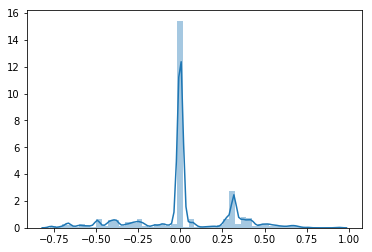

In [42]:
sns.distplot(compound_list);

# word_cloud

In [46]:
neg_title = df_title_compound[df_title_compound['target'] == -1]
neg_title.head()

,title,compound,target
27,Mono-ADP-ribosylation by ARTD10 restricts Chik...,-0.3182,-1
45,Deep Learning-based Detection for COVID-19 fro...,-0.4404,-1
53,Title: Risk of disease spillover from dogs to ...,-0.2732,-1
54,Using Digital Surveillance Tools for Near Real...,-0.2732,-1
58,Clinical features and sexual transmission pote...,-0.4939,-1


In [48]:
neg_string = []
for t in neg_title['title']:
    neg_string.append(t)
neg_string

['Mono-ADP-ribosylation by ARTD10 restricts Chikungunya virus replication by interfering with the proteolytic activity of nsP2 2 3 4',
 'Deep Learning-based Detection for COVID-19 from Chest CT using Weak Label',
 'Title: Risk of disease spillover from dogs to wild carnivores in Kanha Tiger Reserve, India. Running head: Disease spillover from dogs to carnivores',
 'Using Digital Surveillance Tools for Near Real-Time Mapping of the Risk of International Infectious Disease Spread: Ebola as a Case Study',
 'Clinical features and sexual transmission potential of SARS-CoV-2 infected female patients: a descriptive study in Wuhan, China',
 'Acute Myocardial Injury of Patients with Coronavirus Disease 2019',
 'Title: Interventions targeting air travellers early in the pandemic may delay local outbreaks of SARS-CoV-2',
 'DNA-scaffolded biomaterials enable modular and tunable control of cell-based cancer immunotherapies',
 'Original investigation Vicarious traumatization in the general public, m

# Negative sentiment

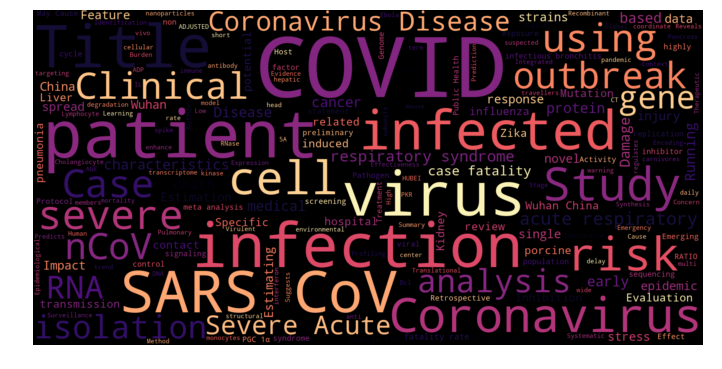

In [52]:
neg_title = df_title_compound[df_title_compound['target'] == -1]
neg_string = []
for t in neg_title['title']:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Positive sentiment

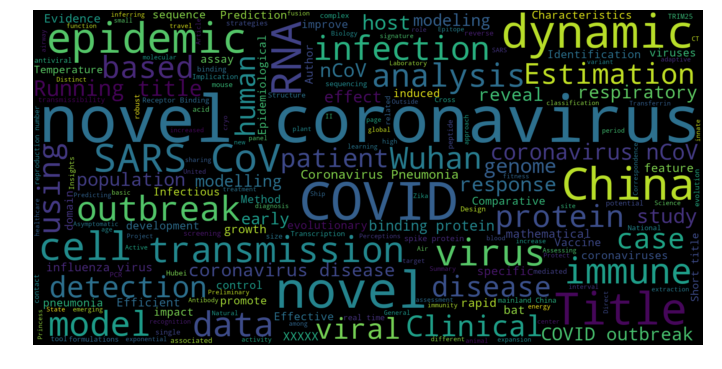

In [50]:
pos_title = df_title_compound[df_title_compound['target'] == 1]
pos_string = []
for t in pos_title['title']:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Neutral sentiment

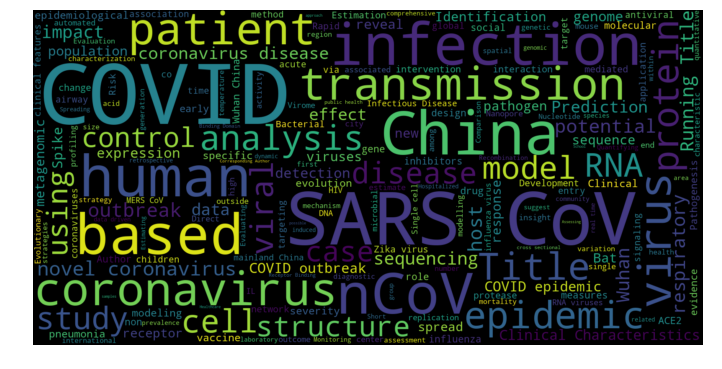

In [51]:
neut_title = df_title_compound[df_title_compound['target'] == 0]
neut_string = []
for t in neut_title['title']:
    neut_string.append(t)
neut_string = pd.Series(neut_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neut_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment analysis words

In [ ]:
sid = SentimentIntensityAnalyzer()

In [63]:
list_x = []
for x in most_common:
    print(x[0])

covid
coronavirus
novel
cov
sars
title
a
china
virus
the
disease
ncov
epidemic
patients
infection
rna
outbreak
based
analysis
transmission
clinical
human
protein
wuhan
study
using
viral
data
respiratory
cell
running
model
host
cells
characteristics
cases
pneumonia
binding
influenza
early
potential
control
detection
viruses
estimation
receptor
expression
sequencing
impact
structure


In [64]:
comp_word_list = []
for x in most_common:
    ss = sid.polarity_scores(x[0])
    comp_word_list.append(ss['compound'])

In [65]:
comp_word_list

[0.0,
 0.0,
 0.3182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# What is known about transmission?

In [68]:
title_list

['The RNA pseudoknots in foot-and-mouth disease virus are dispensable for genome replication but essential for the production of infectious virus. 2 3',
 'Healthcare-resource-adjusted vulnerabilities towards the 2019-nCoV epidemic across China',
 'Real-time, MinION-based, amplicon sequencing for lineage typing of infectious bronchitis virus from upper respiratory samples',
 'A Combined Evidence Approach to Prioritize Nipah Virus Inhibitors',
 'Assessing spread risk of Wuhan novel coronavirus within and beyond China, January-April 2020: a travel network-based modelling study',
 'TWIRLS, an automated topic-wise inference method based on massive literature, suggests a possible mechanism via ACE2 for the pathological changes in the human host after coronavirus infection',
 'Title: Viruses are a dominant driver of protein adaptation in mammals',
 'The impact of regular school closure on seasonal influenza epidemics: a data-driven spatial transmission model for Belgium',
 'Carbon Nanocarrier

In [69]:
df = pd.DataFrame(title_list, columns=['title'])
df.head(20)

,title
0,The RNA pseudoknots in foot-and-mouth disease ...
1,Healthcare-resource-adjusted vulnerabilities t...
2,"Real-time, MinION-based, amplicon sequencing f..."
3,A Combined Evidence Approach to Prioritize Nip...
4,Assessing spread risk of Wuhan novel coronavir...
5,"TWIRLS, an automated topic-wise inference meth..."
6,Title: Viruses are a dominant driver of protei...
7,The impact of regular school closure on season...
8,Carbon Nanocarriers Deliver siRNA to Intact Pl...
9,Protective Population Behavior Change in Outbr...


In [70]:
transmission = df[df['title'].str.contains('transmission')]
len(transmission)

40

In [71]:
transm_title = transmission.title.values

In [72]:
for t in transm_title:
    print(t)

The impact of regular school closure on seasonal influenza epidemics: a data-driven spatial transmission model for Belgium
A spatial model of CoVID-19 transmission in England and Wales: early spread and peak timing
Characterizing the transmission and identifying the control strategy for COVID-19 through epidemiological modeling
Clinical features and sexual transmission potential of SARS-CoV-2 infected female patients: a descriptive study in Wuhan, China
Strongly heterogeneous transmission of COVID-19 in mainland China: local and regional variation Summary Background
Stochastic discrete epidemic modeling of COVID-19 transmission in the Province of Shaanxi incorporating public health intervention and case importation
Population movement, city closure and spatial transmission of the 2019-nCoV 1 infection in China 2
D R A F T Inferring transmission trees to guide targeting of interventions against visceral leishmaniasis and post-kala-azar dermal leishmaniasis
Using heterogeneity in the pop

In [78]:
for t in transm_title:
    if 'contact'  or 'human' in t:
        print(t)

The impact of regular school closure on seasonal influenza epidemics: a data-driven spatial transmission model for Belgium
A spatial model of CoVID-19 transmission in England and Wales: early spread and peak timing
Characterizing the transmission and identifying the control strategy for COVID-19 through epidemiological modeling
Clinical features and sexual transmission potential of SARS-CoV-2 infected female patients: a descriptive study in Wuhan, China
Strongly heterogeneous transmission of COVID-19 in mainland China: local and regional variation Summary Background
Stochastic discrete epidemic modeling of COVID-19 transmission in the Province of Shaanxi incorporating public health intervention and case importation
Population movement, city closure and spatial transmission of the 2019-nCoV 1 infection in China 2
D R A F T Inferring transmission trees to guide targeting of interventions against visceral leishmaniasis and post-kala-azar dermal leishmaniasis
Using heterogeneity in the pop

# NLP-architect